Importing the Libararies

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Proecessing

In [3]:
# loading the csv data to a Pandas DataFrame 
gold_data = pd.read_csv(r"C:\Users\Ayush\OneDrive\Desktop\30 Days 30 Projects\Machine-Learning-Projects\Gold Price Prediction\Data\gld_price_data.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail() # last 5 rows of dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing value 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation: 
1. Positive Correlation 
2. Negative Correlation

In [10]:
correlation = gold_data.select_dtypes(include=['number']).corr()

<Axes: >

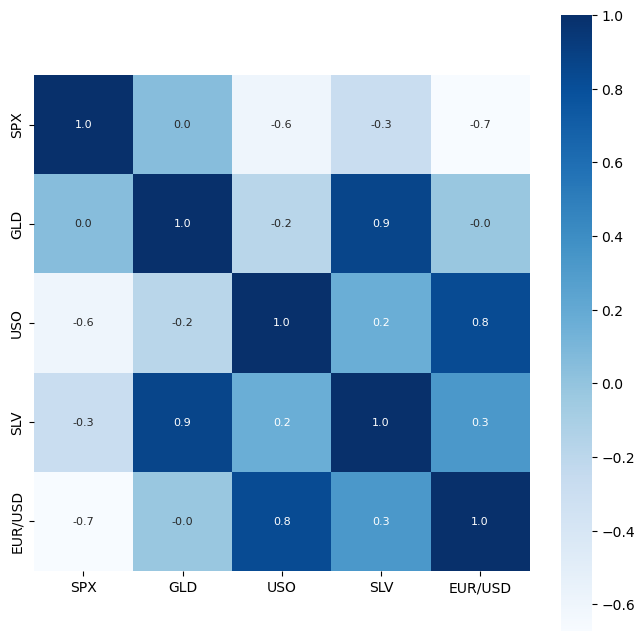

In [11]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values for GLD 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


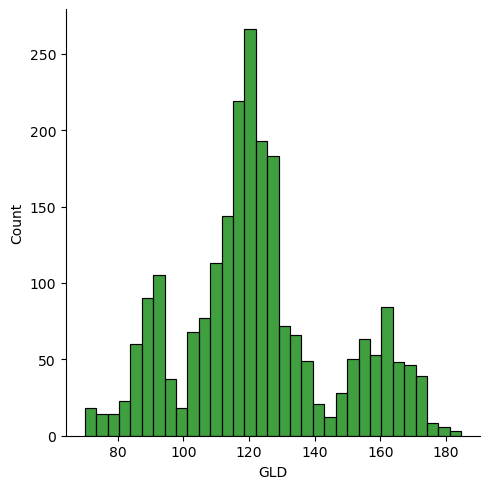

In [13]:
# checking the distribution of the Gold Price 
sns.displot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model training: Random Forest Regression

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# traning the model 
regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model Evaluation

In [20]:
# prediction on Test Data
test_data_predictioin = regressor.predict(X_test)

In [21]:
print(test_data_predictioin)

[168.71789952  81.70669977 115.57949984 127.54730084 120.64680131
 154.66459852 150.70079826 126.13590044 117.4449986  126.01170071
 116.637901   171.6245007  141.82619876 167.81099899 115.06399997
 117.68010018 139.53040301 170.32410147 159.99590295 157.38999883
 155.08510014 125.00700048 175.78390023 156.98930407 125.28650033
  93.84249979  77.40320013 120.56150018 119.08649932 167.45229893
  88.16160056 125.35849984  91.17430066 117.75219997 121.13459885
 136.67480094 115.52000123 114.85560078 148.06639941 107.20380119
 104.09570233  87.06639757 126.45250039 117.80940026 152.72429919
 119.37300036 108.37400008 108.04929833  93.18670025 126.99039826
  74.77560063 113.71619933 121.08220029 111.32559922 118.86049927
 120.53519933 158.49899971 167.39100114 146.88709716  85.82699815
  94.48580062  86.74789832  90.58429997 118.9834006  126.44460082
 127.57790013 168.36889979 122.16419944 117.39349919  98.42310041
 167.7268021  143.35969808 131.74250263 121.05390204 121.65669931
 119.69760

In [22]:
# R Squared error 
error_score = metrics.r2_score(Y_test, test_data_predictioin)
print(f"R squared error: {error_score}")

R squared error: 0.9896217571092993


Compare the Actual Values and Predicted Values in a Plot.

In [23]:
Y_test = list(Y_test)

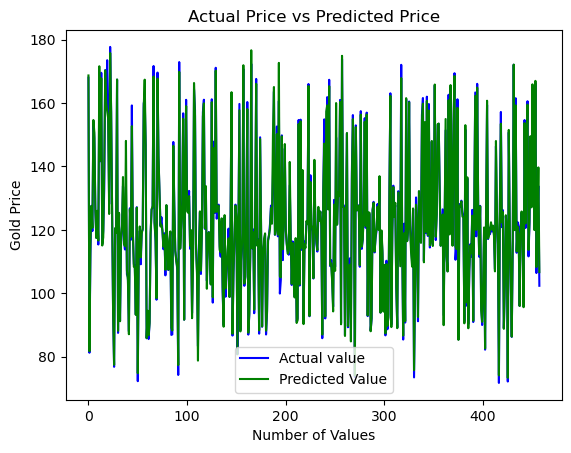

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual value')
plt.plot(test_data_predictioin, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [25]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor, file)